# Problem class 3. Solving a singular boundary-value problem 

Boundary-value problems are much harder than initial-value problems. In this sheet, we will look to study a singular BVP using Python's `solve_bvp` script.  We will study:
\begin{gather}
\epsilon T'' + 2 T' + T = 0, \\
T(0) = 0 \quad \text{and} \quad T(1) = 1,
\end{gather}
where $0 < \epsilon \ll 1$. 

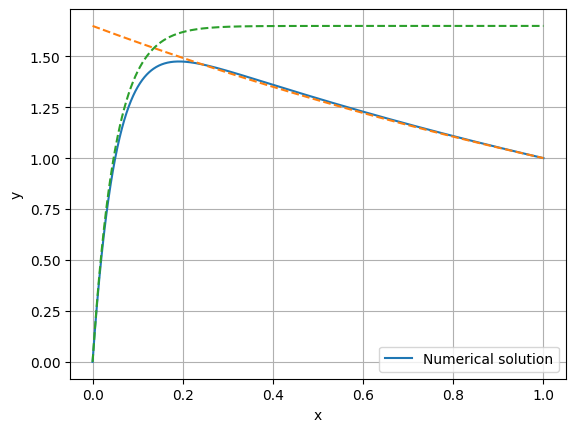

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode(x, y):
    return np.vstack((y[1], (-y[0] - 2*y[1])/ep))

def bc(ya, yb):
    return np.array([ya[0], yb[0] - 1])

# Define epsilon
ep = 0.1

# Define initial mesh
x = np.linspace(0, 1, 5)
y_guess = np.zeros((2, x.size))

# Solve the BVP
sol = solve_bvp(ode, bc, x, y_guess)

# Generate points for plotting
x_plot = np.linspace(0, 1, 1000)
y_plot = sol.sol(x_plot)[0]
y_outer = np.exp(1/2)*np.exp(-x_plot/2)
y_inner = np.exp(1/2)*(1 - np.exp(-2*x_plot/ep))

# Plot the solution
plt.plot(x_plot, y_plot, label='Numerical solution')
plt.plot(x_plot, y_outer, '--')
plt.plot(x_plot, y_inner, '--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Forming a composite solution

Note that it is possible to combine the leading-order inner and outer solutions in order to form a single composite solution that is uniformly valid on the interval. We have
$$
y_\text{outer} = e^{1/2} e^{-x/2} 
$$
which should be combined with the inner solution
$$
y_\text{inner} = e^{1/2}*(1 - e^{-2x/\epsilon})
$$
To do this, we can use the formula:
$$
y_\text{composite} = y_\text{outer} + y_\text{inner} - \text{overlap}.
$$
where the overlap takes into account that in the outer region, the inner solution tends to the constant $e^{1/2}$. Therefore, if we simply add the two solutions together, we are adding an extra constant to the right-hand side value of the composite, near $x = 1$. Visualised below is the composite solution. 

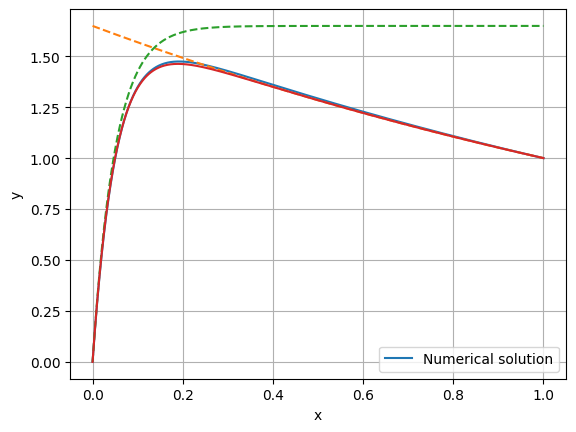

In [3]:
# Plot the solution
plt.plot(x_plot, y_plot, label='Numerical solution')
plt.plot(x_plot, y_outer, '--')
plt.plot(x_plot, y_inner, '--')
plt.plot(x_plot, y_inner + y_outer - np.exp(1/2))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()